In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#linear algebra
import numpy as np
import pandas as pd
import sys
#import lux
 

#statistical tests
from scipy import stats
from scipy.stats import pearsonr, spearmanr


from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import median_absolute_error, r2_score, mean_absolute_error, mean_squared_error
from statsmodels.formula.api import ols

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import bamboolib as bam
import plotly.graph_objs as go
import plotly.io as pio

pio.renderers

#display max columns
pd.set_option('display.max_columns', None)
#use this format specifier exactly AS IS to avoid breaking module, space matters!
pd.options.display.float_format = '{:20,.2f}'.format 
sns.set_style("white")

In [2]:
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing the function
from acquire import get_fifa_data

In [3]:
import sys
 
# the system path
sys.path.append('/Users/Ray/codeup-data-science/fifa')
 
# importing split
import prepare, model

In [4]:
#acquire
df = get_fifa_data()

In [5]:
#prepare
df = prepare.prepped_data(df)

Before dropping nulls, 142079 rows, 111 cols
After dropping nulls. 131489 rows. 66 cols
After cleaning the data and adding additional columns there are: 98804 rows. 83 cols


In [6]:
#return defenders df after prepped
goalkeeper_df, forward_df, midfielder_df, defender_df = prepare.acquire_players_by_position(df)

In [7]:
# 1) Does age impact salary?
# 2) Does seniority(length of time playing with a club) impact salary?
# 3) Does the league a player is with impact salary?
# 4) Do players with unusual body types have higher or lower salaries?
# 5) Does nationality impact salary?
# 6) Does international reputation impact salary?
# 7) Does contract length positively or negatively impact salary? (edited) 

In [8]:
#split data on defenders
train, validate, test = prepare.split(defender_df)
# Step: Keep rows where (age is not missing) and (wage_eur is not missing)
train = train.loc[(train['age'].notna()) & (train['wage_eur'].notna())]

# Step: Sort column(s) age ascending (A-Z), wage_eur ascending (A-Z)
train = train.sort_values(by=['age', 'wage_eur'], ascending=[True, True])

train

Train: 19072 rows, 83 cols
Validate: 8542 rows, 83 cols
Test: 4647 rows, 83 cols


       sofifa_id             short_name player_positions  overall  potential  \
212       164240           Thiago Silva               CB       87         87   
218       179944             David Luiz               CB       82         83   
224        53405                Maxwell               LB       77         77   
225       183937        G. van der Wiel               RB       77         80   
452       198076           A. Abdennour               CB       79         83   
...          ...                    ...              ...      ...        ...   
96885     241553             C. Collins               CB       49         62   
97077     245417              J. Manley               CB       48         59   
97760     213715                N. Baba               CB       52         64   
98745     241613                K. Katz               CB       54         71   
98748     242149  K. Kouassivi-Benissan               RB       52         70   

                 value_eur             

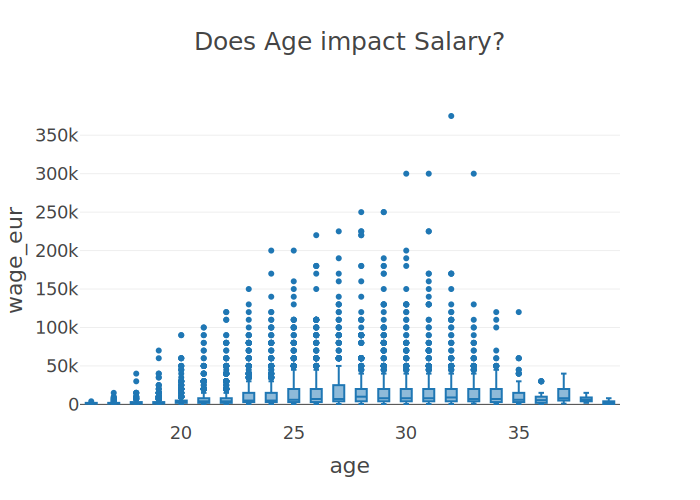

In [9]:
# graphs age vs salary on boxplot
fig = px.box(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='age', y='wage_eur', 
             hover_name='wage_eur', template='presentation', title='Does Age impact Salary?')
fig.show(renderer="svg")

### Takeaway

In [77]:
top_15 = df.nlargest(15, 'overall')
top_15.head(5)

sofifa_id                                         player_url  \
38183     158023  https://sofifa.com/player/158023/lionel-messi/...   
56666      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
56667     158023  https://sofifa.com/player/158023/lionel-messi/...   
74751      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
92705      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   

              short_name                            long_name  \
38183           L. Messi       Lionel Andrés Messi Cuccittini   
56666  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
56667           L. Messi       Lionel Andrés Messi Cuccittini   
74751  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
92705  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   

      player_positions  overall  potential            value_eur  \
38183       RW, CF, ST       94         94        95,500,000.00   
56666           ST, LW       94         94        77,000,000.00   
56667       CF, RW, ST       94         94       110,500,000.00   
74751           LW, ST       94         94        95,500,000.00   
92705       LW, LM, ST       94         94        87,000,000.00   

                  wage_eur  age         dob  height_cm  weight_kg  \
38183           560,000.00   32  1987-06-24        170         72   
56666           400,000.00   33  1985-02-05        187         83   
56667           575,000.00   31  1987-06-24        170         72   
74751           575,000.00   32  1985-02-05        185         80   
92705           575,000.00   31  1985-02-05        185         80   

              club_team_id       club_name             league_name  \
38183               241.00    FC Barcelona  Spain Primera Division   
56666                45.00        Juventus         Italian Serie A   
56667               241.00    FC Barcelona  Spain Primera Division   
74751               243.00  Real Madrid CF  Spain Primera Division   
92705               243.00  Real Madrid CF  Spain Primera Division   

              league_level club_position   club_jersey_number  \
38183                 1.00            RW                10.00   
56666                 1.00            ST                 7.00   
56667                 1.00            RW                10.00   
74751                 1.00            LW                 7.00   
92705                 1.00            LW                 7.00   

      club_loaned_from club_joined  club_contract_valid_until  nationality_id  \
38183              NaN  2004-07-01                   2,021.00              52   
56666              NaN  2018-07-10                   2,022.00              38   
56667              NaN  2004-07-01                   2,021.00              52   
74751              NaN  2009-07-01                   2,021.00              38   
92705              NaN  2009-07-01                   2,018.00              38   

      nationality_name       nation_team_id nation_position  \
38183        Argentina                  NaN             NaN   
56666         Portugal             1,354.00              LS   
56667        Argentina             1,369.00              CF   
74751         Portugal             1,354.00              LS   
92705         Portugal             1,354.00              LS   

       nation_jersey_number preferred_foot  weak_foot  skill_moves  \
38183                   NaN           Left          4            4   
56666                  7.00          Right          4            5   
56667                 10.00           Left          4            4   
74751                  7.00          Right          4            5   
92705                  7.00          Right          4            5   

       international_reputation      work_rate body_type real_face  \
38183                         5     Medium/Low    Unique       Yes   
56666                         5       High/Low    Unique       Yes   
56667                         5  Medium/Medium    Unique      

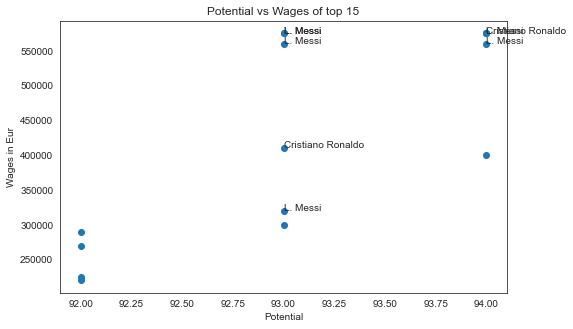

In [78]:
# Let's see if high overall score correlates with earnings, for the top 15 players

fig, ax = plt.subplots(figsize=(8,5))

plt.scatter(top_15['potential'], top_15['wage_eur'] )
plt.text(top_15.iloc[0]['potential'], top_15.iloc[0]['wage_eur'], top_15.iloc[0]['short_name'])
# plt.text(top_15.iloc[1]['potential'], top_15.iloc[1]['wage_eur'], top_15.iloc[1]['short_name']) for better view
plt.text(top_15.iloc[2]['potential'], top_15.iloc[2]['wage_eur'], top_15.iloc[2]['short_name'])
# plt.text(top_15.iloc[3]['potential'], top_15.iloc[3]['wage_eur'], top_15.iloc[3]['short_name'])
plt.text(top_15.iloc[4]['potential'], top_15.iloc[4]['wage_eur'], top_15.iloc[4]['short_name'])
plt.text(top_15.iloc[5]['potential'], top_15.iloc[5]['wage_eur'], top_15.iloc[5]['short_name'])
plt.text(top_15.iloc[6]['potential'], top_15.iloc[6]['wage_eur'], top_15.iloc[6]['short_name'])
plt.text(top_15.iloc[7]['potential'], top_15.iloc[7]['wage_eur'], top_15.iloc[7]['short_name'])
plt.text(top_15.iloc[8]['potential'], top_15.iloc[8]['wage_eur'], top_15.iloc[8]['short_name'])
plt.text(top_15.iloc[9]['potential'], top_15.iloc[9]['wage_eur'], top_15.iloc[9]['short_name'])

ax.set_title("Potential vs Wages of top 15")
ax.set_ylabel('Wages in Eur')
ax.set_xlabel('Potential')

plt.show()

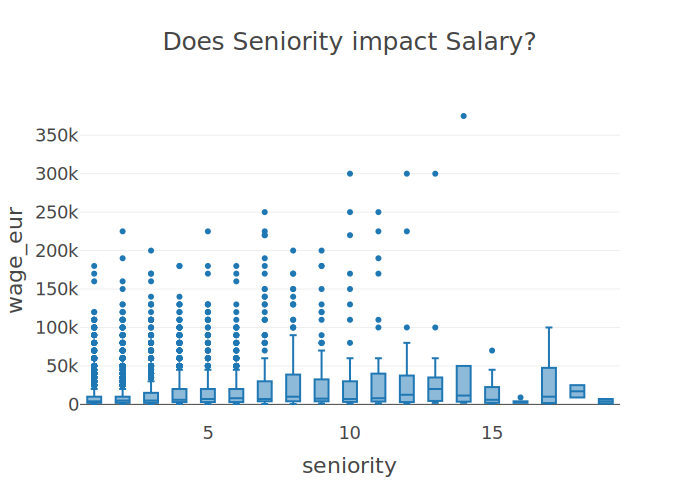

In [10]:

fig = px.box(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='seniority', y='wage_eur', 
             template='presentation', title='Does Seniority impact Salary?')
fig.show(renderer="svg")

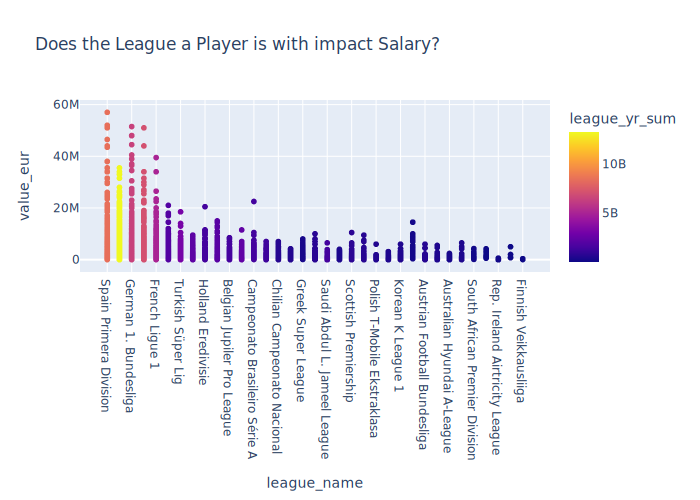

In [73]:

fig = px.scatter(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='league_name', y='value_eur', color='league_yr_sum', title='Does the League a Player is with impact Salary?')
fig.update_xaxes(categoryorder='total descending')
fig.show(renderer='svg')

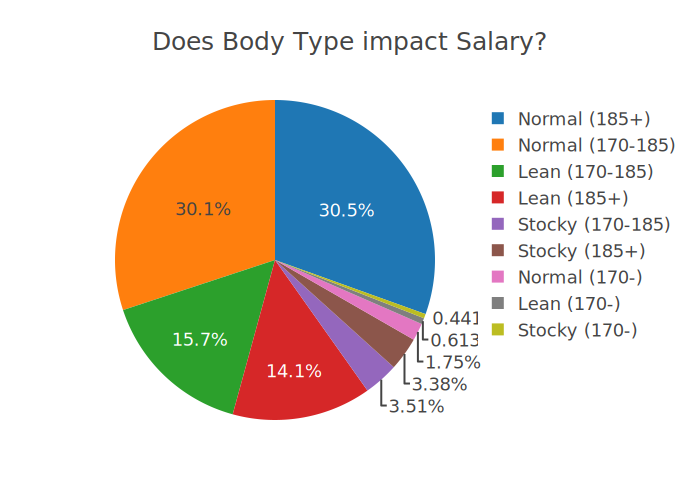

In [12]:
import plotly.express as px
fig = px.pie(train.sample(n=10000, replace=False, random_state=123).sort_index(), values='total_wage', names='body_type', template='presentation', title='Does Body Type impact Salary?')
fig.show(renderer="svg")

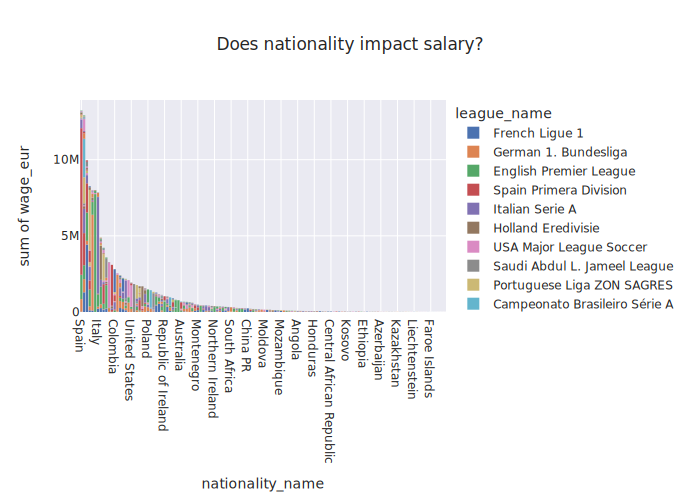

In [13]:

fig = px.histogram(train.sample(n=10000, replace=False, random_state=123).sort_index(), x='nationality_name', y='wage_eur', template='seaborn', color='league_name', title='Does nationality impact salary?')
fig.update_xaxes(categoryorder='total descending')
fig.update_layout(autosize=True)
fig.show(renderer="svg")

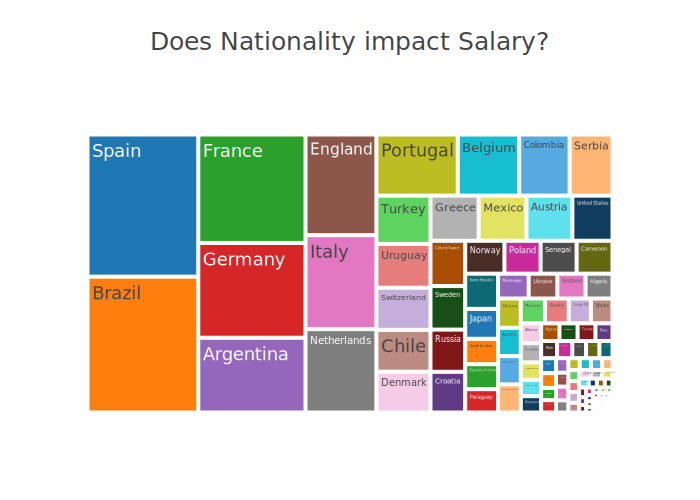

In [14]:

fig = px.treemap(train.sample(n=10000, replace=False, random_state=123).sort_index(), path=['nationality_name'], values='total_wage', title='Does Nationality impact Salary?', template='presentation')
fig.show(renderer='svg')

Text(0.5, 1.0, 'Does international reputation impact salary?')

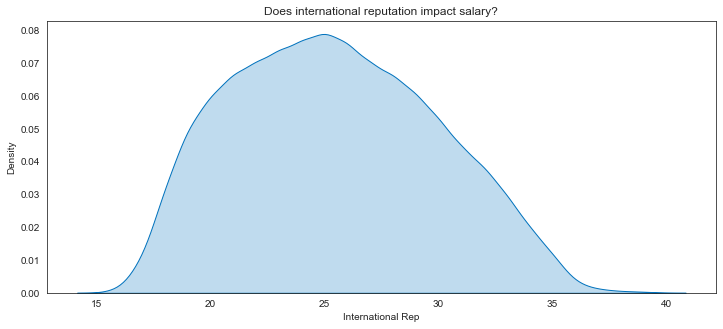

In [68]:
Mth = sns.kdeplot(train.age[(train["total_wage"] >1) ],
                color="#0072BD", shade = True)
Mth.set_ylabel('Density')
Mth.set_xlabel('International Rep')
Mth.set_title('Does international reputation impact salary?')


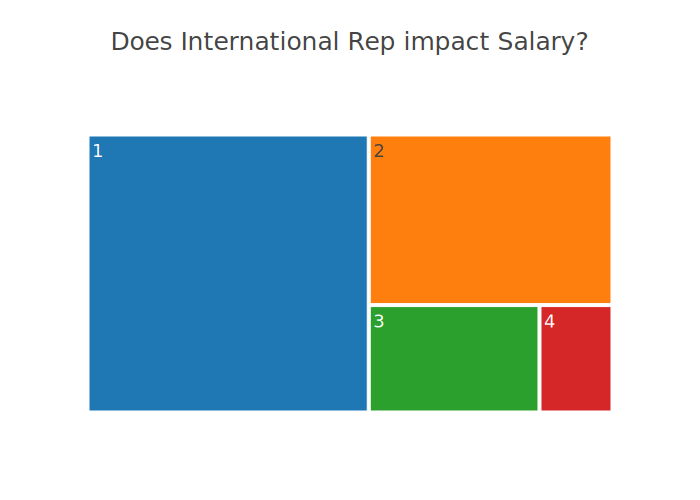

In [16]:
import plotly.express as px
fig = px.treemap(train.sample(n=10000, replace=False, random_state=123).sort_index(), path=['international_reputation'], values='total_wage', title='Does International Rep impact Salary?', template='presentation')
fig.show(renderer='svg')

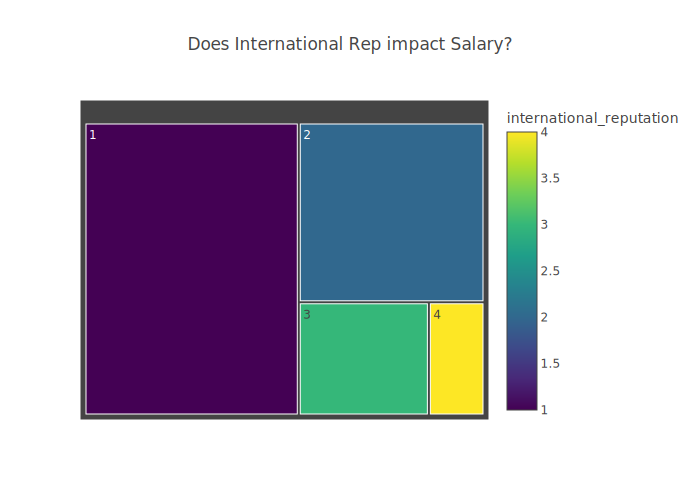

In [17]:
import plotly.express as px
fig = px.treemap(train.sample(n=10000, replace=False, random_state=123).sort_index(), path=['international_reputation'], values='total_wage', title='Does International Rep impact Salary?', template='xgridoff', color='international_reputation')
fig.show(renderer='svg')

<AxesSubplot:xlabel='international_reputation', ylabel='total_wage'>

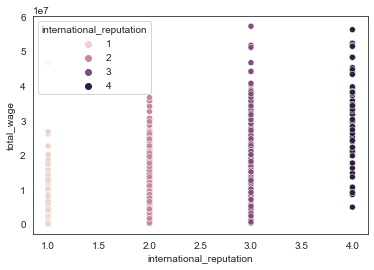

In [18]:
# Plots lats/longs by tax amount
sns.scatterplot(x=train.international_reputation , y=train.total_wage, hue=train.international_reputation)

<AxesSubplot:xlabel='international_reputation', ylabel='total_wage'>

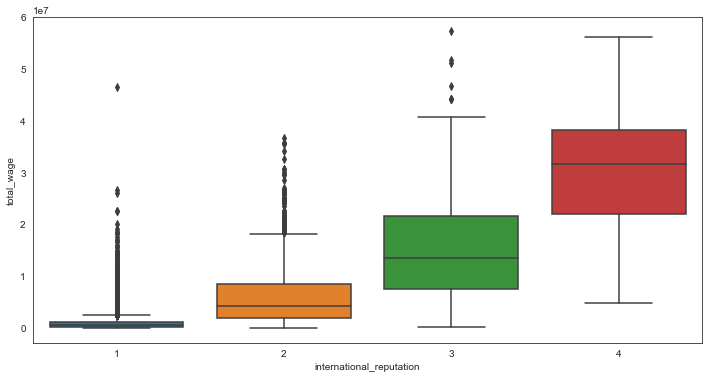

In [19]:
# boxplot showing total wage by international rep
plt.figure(figsize=(12,6))
sns.boxplot(x= train[train.total_wage>1].international_reputation, 
            y= train[train.total_wage>1].total_wage, data=train[train.total_wage>1])

In [20]:
#categorical columns
catcols = [col for col in train.columns if train[col].dtype == 'O']
catcols

['short_name',
 'player_positions',
 'club_name',
 'league_name',
 'nationality_name',
 'club_position',
 'position',
 'field_position',
 'club_joined',
 'body_type',
 'preferred_foot',
 'work_rate']

In [21]:
#numerical columns
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['sofifa_id',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'nationality_id',
 'club_contract_valid_until',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physical',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill_dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'gk_speed',
 'year',
 'total_wage',
 'age_bins',
 'height_bins',
 'weight_bins',
 'year_joined',
 'wage_year',
 'league_yr_sum',
 'club_name_yr_sum',
 'seniority',
 'club_position_encoded',
 'wo

In [22]:
#return unique numerical values
unique_values = df.select_dtypes(include='number').nunique().sort_values()

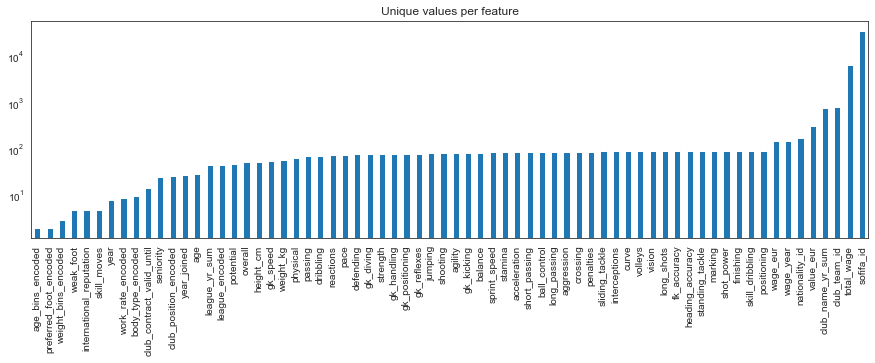

In [23]:
# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

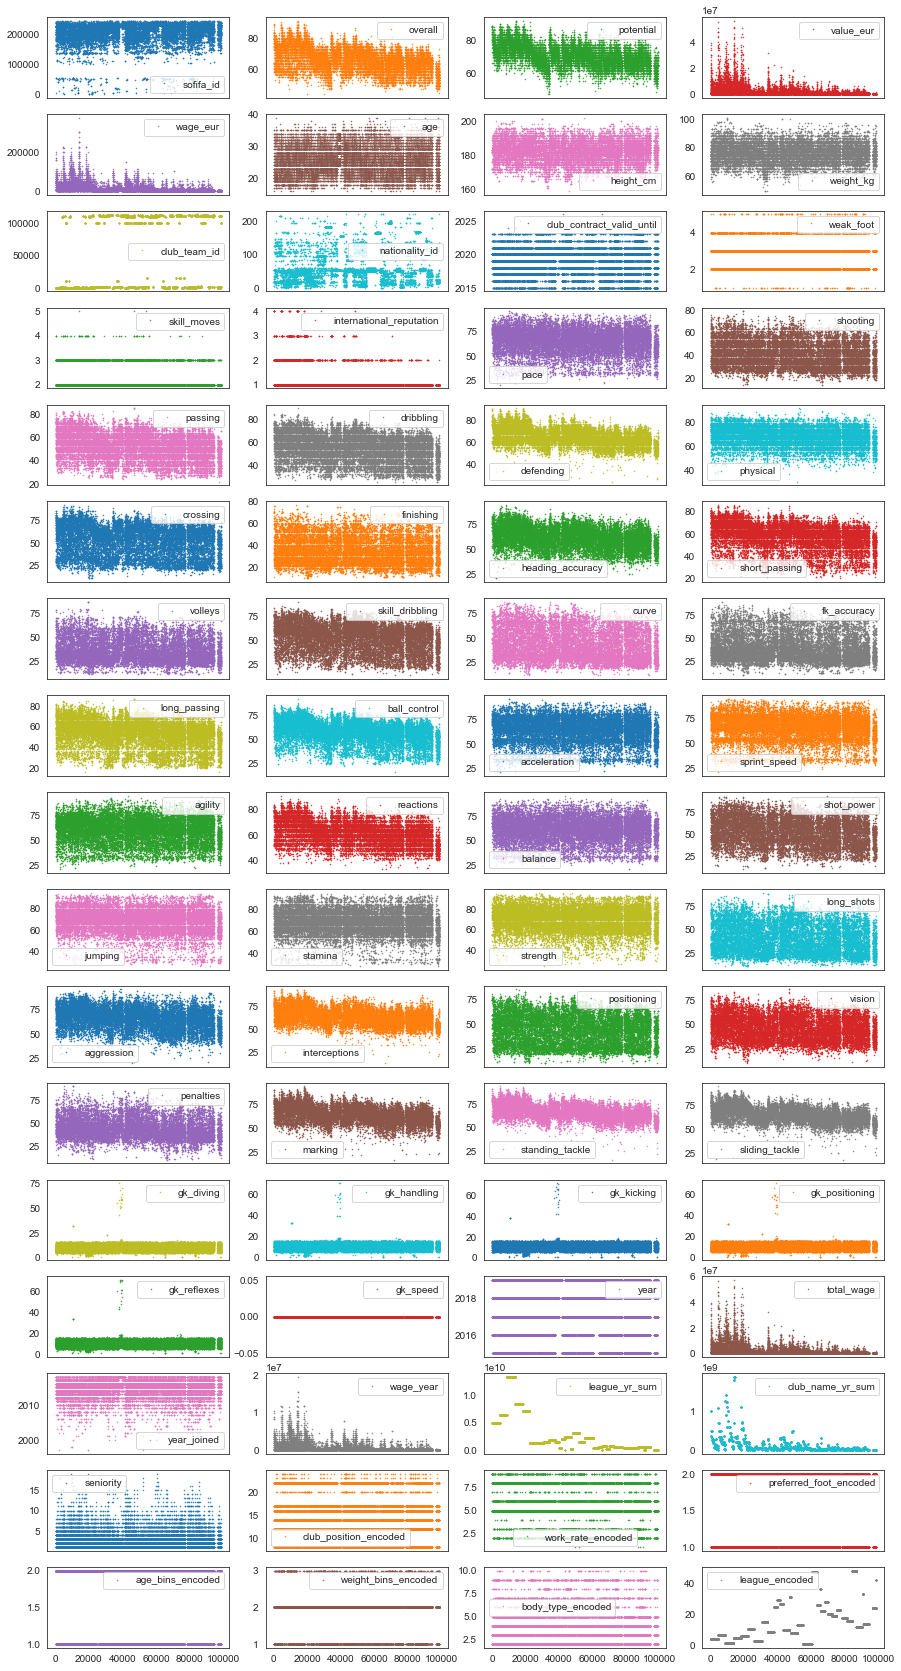

In [24]:
#plots all numerical values
#lw=0: lw stands for line width. 0 means that we don't want to show any lines
#marker=".": Instead of lines, we tell the plot to use . as markers for each data point
#subplots=True: subplots tells pandas to plot each feature in a separate subplot
#layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. 
#The -1 means "as many as needed", while the 2 means to use 2 columns per row.
#figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a 
#figure height of roughly the number of features, and to adjust the markersize accordingly.

train.plot(lw=0, marker='.',subplots=True,layout=(-1,4),figsize=(15,30),markersize=1);

In [25]:
# General look at how many unique values each of these non-numerical features contain, and how often their most
# frequent category is represented.
train.describe(exclude=['number','datetime'])

       short_name player_positions    club_name                 league_name  \
count       19072            19072        19072                       19072   
unique       8539              308          651                          35   
top       Marcelo               CB  FC Augsburg  Argentina Primera División   
freq           16             8702           62                        1081   

       nationality_name club_position    position field_position club_joined  \
count             19072         19072       19072          19072       19072   
unique              145             9           9              3        1705   
top           Argentina           SUB  Substitute       Defender  2015-07-01   
freq               1271          7516        7516           8589         619   

               body_type preferred_foot      work_rate age_bins height_bins  \
count              19072          19072          19072    19072       19072   
unique                 9              2      

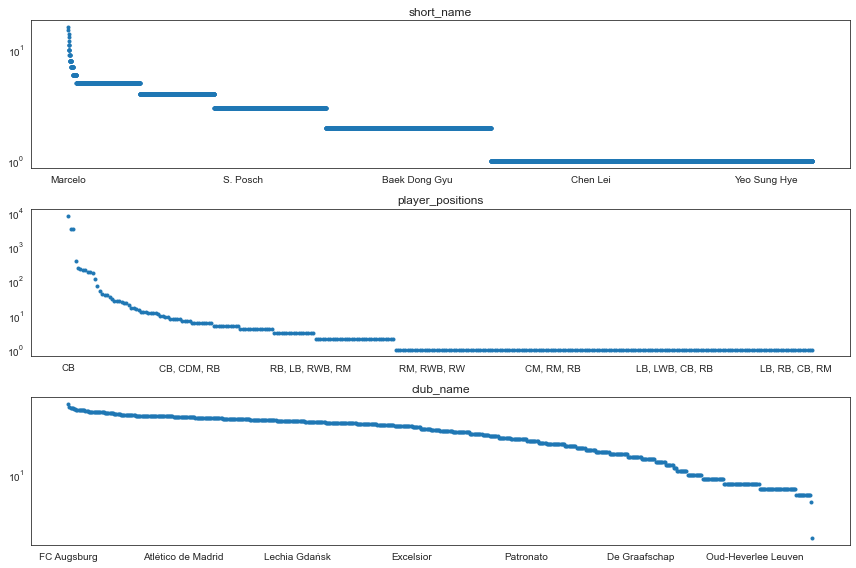

In [26]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = train.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

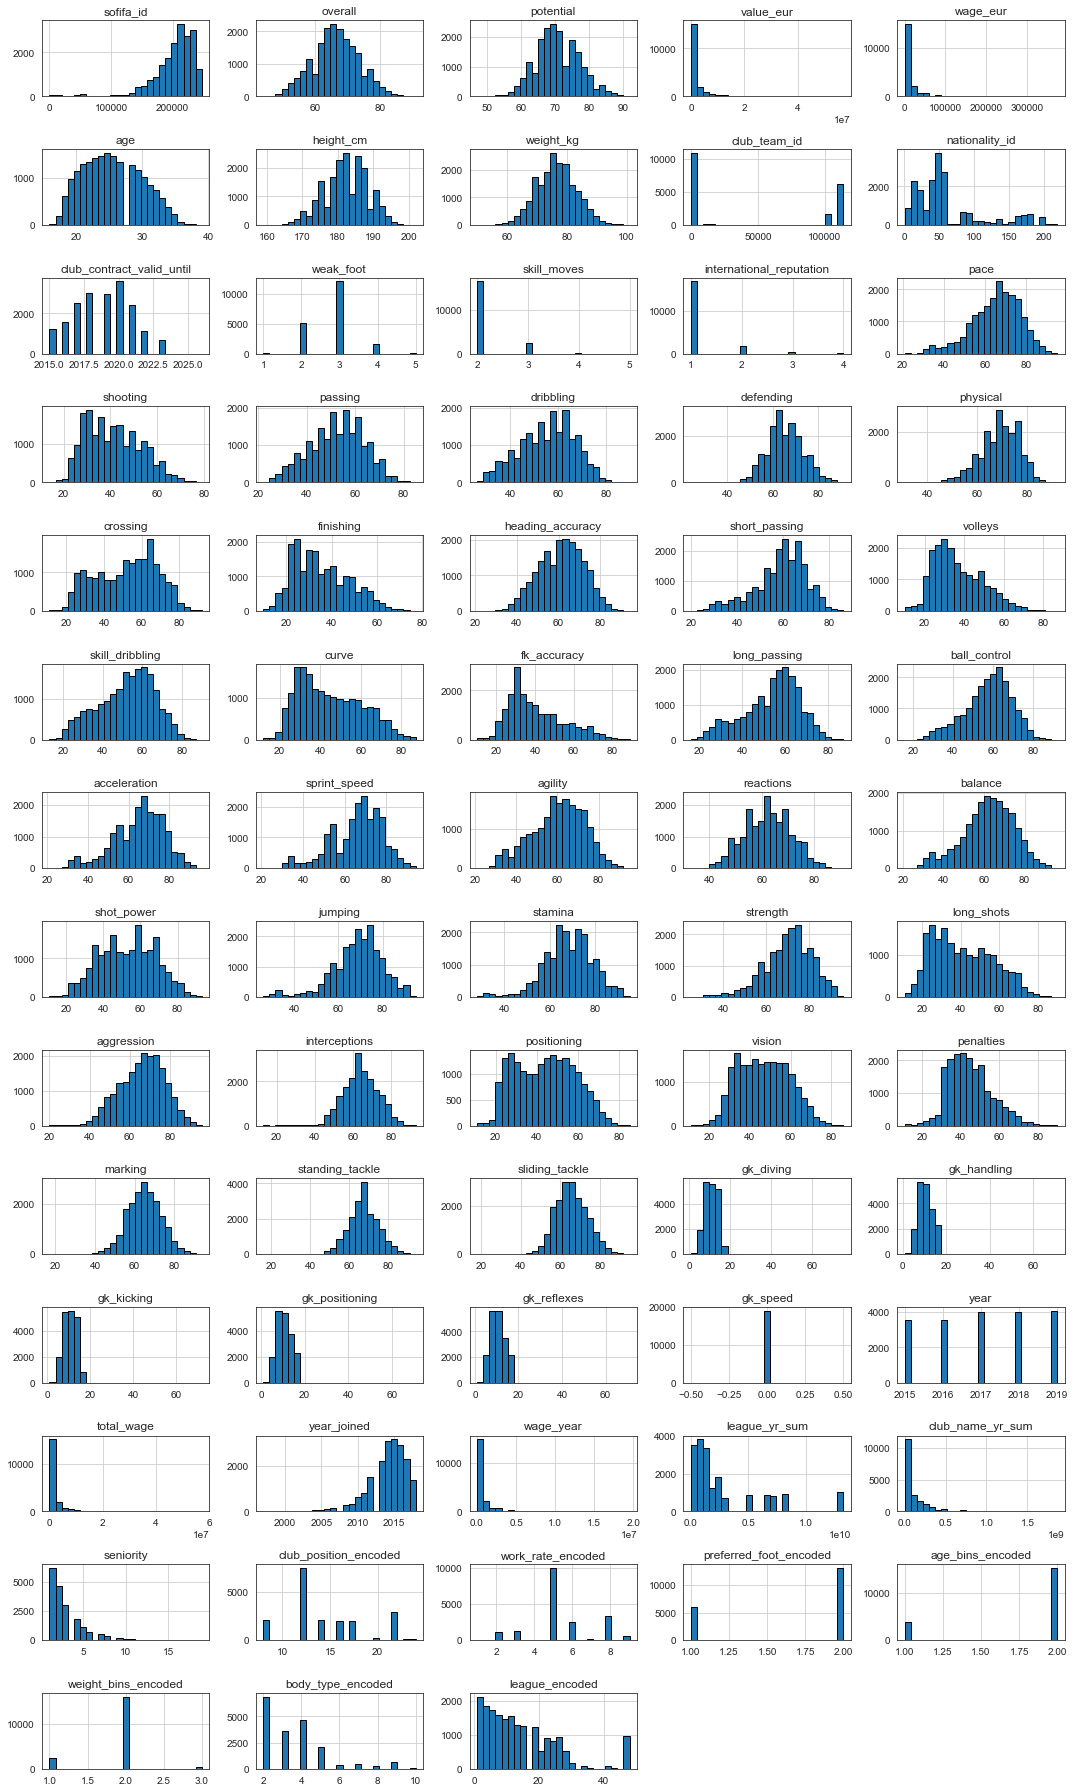

In [27]:
# Plots the histogram for each numerical feature in a separate subplot
train.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

# Feature patterns
Next step on the list is the investigation of feature specific patterns. The goal of this part is two fold:

> 1. Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
> 2. Can we identify particular relationships between features that will help us to better understand our dataset?
> - randomly selected features

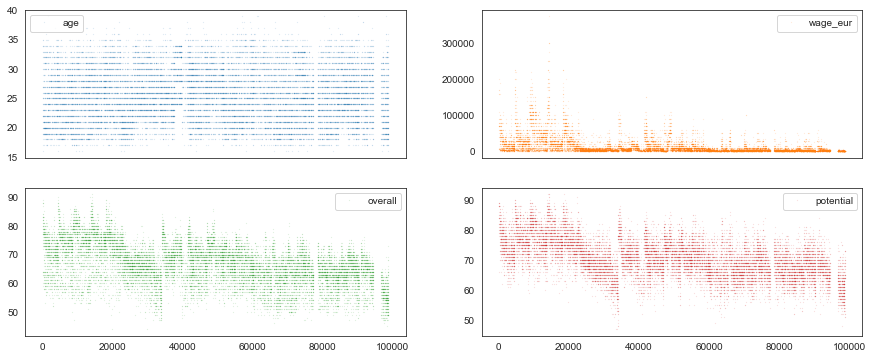

In [28]:
train[["age",
      "wage_eur",
      'overall',
      'potential']].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
  markersize=0.1, figsize=(15, 6));

In [29]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = train.select_dtypes(include="number").nunique() >= 25

In [30]:
# Create a new dataframe which only contains the continuous features
df_continuous = train[cols_continuous[cols_continuous].index]
df_continuous.shape

(19072, 53)

In [31]:
#takes too long to run.

#sns.pairplot(df_continuous, height=1.5,
             #plot_kws={"s": 2, "alpha": 0.2});

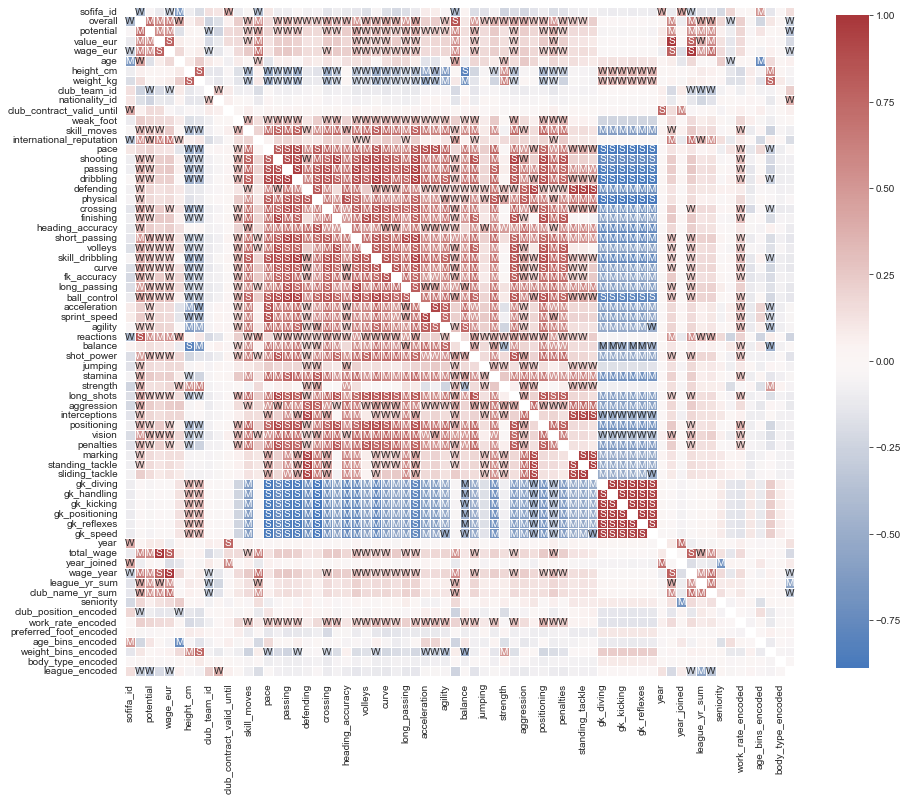

In [32]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

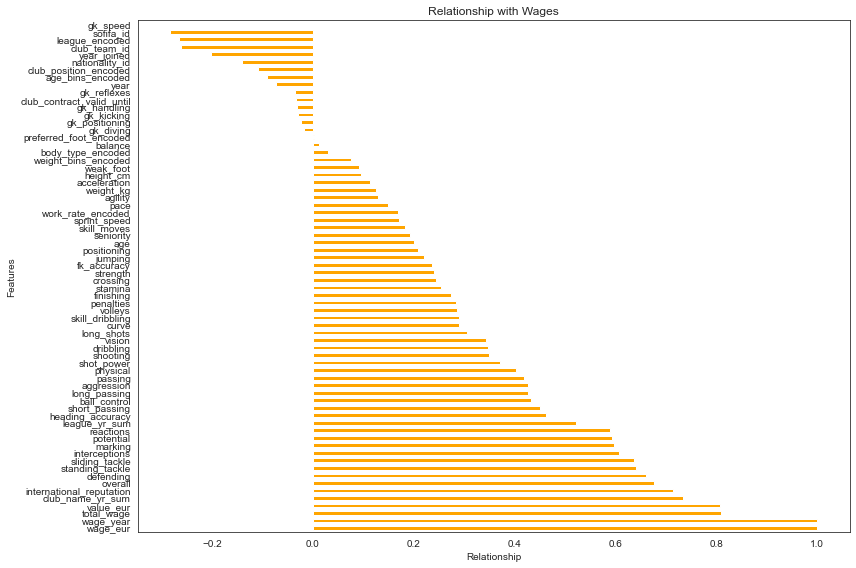

In [33]:
plt.figure(figsize = (12 , 8))
train.corr()['wage_eur'].sort_values(ascending = False).plot(kind = 'barh', color = 'orange')
#plt.figure(figsize= 3,3)
plt.title('Relationship with Wages')
plt.xlabel('Relationship')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# - 1.) Does age impact salary?

Pearson's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between age and salary.

𝐻𝑎: There is a linear relationship between age and salary.

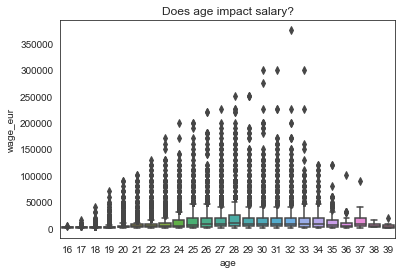

In [34]:
#rays visualization
sns.boxplot(train.age, train.wage_eur)
plt.title("Does age impact salary?")
rcParams['figure.figsize'] = 12, 5
plt.show()

In [35]:
import pandas as pd
df = pd.read_csv(r'/Users/Ray/codeup-data-science/fifa/Ray/fifa.csv', sep=',', decimal='.', nrows=100000)
df

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
99995     226592  https://sofifa.com/player/226592/jakub-jankto/...   
99996     226615  https://sofifa.com/player/226615/franco-caneve...   
99997     226711  https://sofifa.com/player/226711/nik-omladic/1...   
99998     226723  https://sofifa.com/player/226723/leonardo-sald...   
99999     226733  https://sofifa.com/player/226733/david-ramirez...   

              short_name                            long_name  \
0               L. Messi       Lionel Andrés Messi Cuccittini   
1         R. Lewa

In [36]:
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.age, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.200
P-value: 0.000
Reject the null hypothesis.


# 2) Does seniority(length of time playing with a club) impact salary?

Spearman's Correlation Coefficient

$\alpha$ = .05

$𝐻_{0}$: There is no linear correlation with between seniority and salary.

𝐻𝑎: There is a linear relationship between seniority and salary.

In [37]:
#seniority not normally distributed, use Spearman's
#set alpha
α = 0.05

#perform test
r, p = spearmanr(train.seniority, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.151
P-value: 0.000
Reject the null hypothesis.


### 3) Does the league a player is with impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: League and salary are independent.

𝐻𝑎: League and salary are not independent.

In [38]:
#setup crosstab
observed = pd.crosstab(train.league_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


#### Are the wages of the English Premier League significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: EPL mean wages are <= than the combined mean wages of all the leagues.

𝐻𝑎: EPL mean wages are > than the combined mean wages of all the leagues.

In [39]:
#set alpha
α = 0.05

#get sample
epl_sample = train[train.league_name == 'English Premier League'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(epl_sample, overall_mean)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of EPL wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


#### Are the wages of FC Barcelona significantly higher than the mean wage?

One Sample T-Test

$\alpha$ = .05

$𝐻_{0}$: FC Barcelona mean wages are <= than the combined mean wages.

𝐻𝑎: FC Barcelona mean wages are > than the combined mean wages of all the leagues.

In [40]:
#set alpha
α = 0.05

#get sample
bar_sample = train[train.club_name == 'FC Barcelona'].wage_eur

#get mean
overall_mean = train.wage_eur.mean()

#perform test
t, p = stats.ttest_1samp(bar_sample, overall_mean)

#print p-value
print(f'P Value: {p/2:.3f}')

#evaluate if mean of Barcelona wages is significantly higher than all wages, is p/2 < a and t > 0?
if p/2 < α and t > 0:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

P Value: 0.000
Reject the null hypothesis.


### 4) Do players with unusual body types have higher or lower salaries?

In [41]:
#add chi^2 for the unusual body types column

#### Is there a linear relationship between height and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between height and salary.

𝐻𝑎: There is a linear relationship between height and salary.

In [42]:
#height is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.height_cm, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.095
P-value: 0.000
Reject the null hypothesis.


#### Is there a linear relationship between weight and salary?

Pearson's R

$\alpha$ = .05

$𝐻_{0}$: There is no linear relationship between weight and salary.

𝐻𝑎: There is a linear relationship between weight and salary.

In [43]:
#weight is normally distributed, use Pearson's
#set alpha
α = 0.05

#perform test
r, p = pearsonr(train.weight_kg, train.wage_eur)

#evaluate coefficient and p-value
print(f'Correlation Coefficient: {r:.3f}\nP-value: {p:.3f}')

#evaluate if p < α
if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

Correlation Coefficient: 0.125
P-value: 0.000
Reject the null hypothesis.


### 5) Does nationality impact salary?

#### Is there a linear relationship between nationality and salary?
$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Nationality and salary are independent.

𝐻𝑎: Nationality and salary are not independent.

In [44]:
#setup crosstab
observed = pd.crosstab(train.nationality_name, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


### 6.) Does international reputation impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: International reputation and salary are independent.

𝐻𝑎: International reputation and salary are not independent.

In [45]:
#setup crosstab
observed = pd.crosstab(train.international_reputation, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


### 7.) Does contract length positively or negatively impact salary?

$Chi^{2}$ Hypothesis

$\alpha$ = .05

$𝐻_{0}$: Contract and salary are independent.

𝐻𝑎: Contract and salary are not independent.

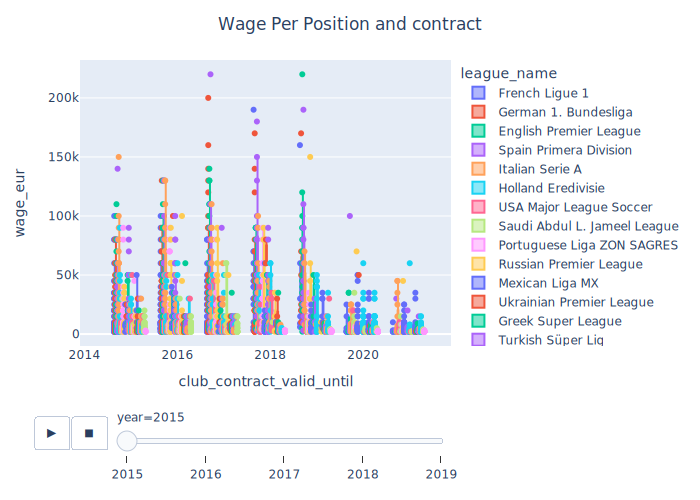

In [64]:
#Bert's visualization

fig = px.box(train, x="club_contract_valid_until", y="wage_eur", points="all", animation_frame='year', color="league_name",
                   hover_name="league_name")
fig.update_xaxes(categoryorder = 'mean ascending')
fig.update_layout(title_text='Wage Per Position and contract ', title_x=0.5)
fig.show(renderer='svg')

In [47]:
#setup crosstab
observed = pd.crosstab(train.seniority, train.wage_eur)

chi2, p, degf, expected = stats.chi2_contingency(observed)
round(p ,3)

#print p-value
print(f'P Value: {p:.3f}')

if p < α:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null.')

P Value: 0.000
Reject the null hypothesis.


# Feature Selection

In [48]:
features_cor =  train.corr()['wage_eur'].sort_values(ascending=False)
features_cor = pd.DataFrame(features_cor)
features_cor.head(20)

                                     wage_eur
wage_eur                                 1.00
wage_year                                1.00
total_wage                               0.81
value_eur                                0.81
club_name_yr_sum                         0.73
international_reputation                 0.71
overall                                  0.68
defending                                0.66
standing_tackle                          0.64
sliding_tackle                           0.64
interceptions                            0.61
marking                                  0.60
potential                                0.59
reactions                                0.59
league_yr_sum                            0.52
heading_accuracy                         0.46
short_passing                            0.45
ball_control                             0.43
long_passing                             0.43
aggression                               0.43

#### Select K Best
['short_passing',
 'volleys',
 'curve',
 'long_passing',
 'ball_control',
 'reactions',
 'shot_power',
 'long_shots',
 'vision',
 'potential']

#### RFE
['age',
 'weak_foot',
 'skill_moves',
 'reactions',
 'potential',
 'seniority',
 'preferred_foot_encoded',
 'age_bins_encoded',
 'weight_bins_encoded',
 'body_type_encoded']

## Create X_train, y_train, etc. by Year

#### Establish Baseline

In [49]:
#get baseline, baseline is mean/median of dependent variable yhat_baseline == baseline

baseline = round(train.wage_eur.mean(),2)

print(f' Baseline is: ${baseline}')

 Baseline is: $14011.17


In [50]:
#get baseline, baseline is mean/median of dependent variable yhat_baseline == baseline

baseline = round(train.wage_eur.median(),2)

print(f' Baseline is: ${baseline}')

 Baseline is: $5000.0


In [51]:
features = [
    'potential',
    'reactions',
    'vision',
    'short_passing',
    'long_passing',
    'ball_control',
    'curve',
    'shot_power',
    'volleys',
    'long_shots',
    'fk_accuracy',
    'crossing',
    'skill_dribbling',
    'penalties',
    'positioning',
    'age_bins_encoded',
    'weight_bins_encoded',
    'body_type_encoded',
    'seniority',
    'skill_moves',
    'weak_foot',
    'age',
    'preferred_foot_encoded']

In [52]:
bam.disable()

The bamboolib extension was disabled. You can enable it again via 'bam.enable()'. In case that bamboolib was not helpful to you, we are sorry and would like to fix this. Please write us a quick mail to info@8080labs.com so that we can serve you better in the future. Best regards, Tobias and Florian


In [54]:
train.head()

sofifa_id       short_name player_positions  overall  potential  \
212     164240     Thiago Silva               CB       87         87   
218     179944       David Luiz               CB       82         83   
224      53405          Maxwell               LB       77         77   
225     183937  G. van der Wiel               RB       77         80   
452     198076     A. Abdennour               CB       79         83   

               value_eur             wage_eur  age  height_cm  weight_kg  \
212        29,000,000.00           190,000.00   29        183         79   
218        14,500,000.00           160,000.00   27        189         84   
224         3,100,000.00            80,000.00   32        176         73   
225         5,500,000.00           100,000.00   26        181         69   
452         7,500,000.00            60,000.00   24        187         84   

            club_team_id            club_name     league_name  nationality_id  \
212                73.00  Paris Saint-Germain  French Ligue 1              54   
218                73.00  Paris Saint-Germain  French Ligue 1              54   
224                73.00  Paris Saint-Germain  French Ligue 1              54   
225                73.00  Paris Saint-Germain  French Ligue 1              34   
452                69.00            AS Monaco  French Ligue 1             145   

    nationality_name club_position           position field_position  \
212           Brazil           LCB   Left Centre Back       Defender   
218           Brazil           RCB  Right Centre Back       Defender   
224           Brazil            LB          Left Back       Defender   
225      Netherlands            RB         Right Back       Defender   
452          Tunisia           LCB   Left Centre Back       Defender   

    club_joined  club_contract_valid_until         body_type preferred_foot  \
212  2012-07-01                   2,018.00  Normal (170-185)          Right   
218  2014-07-01                   2,019.00     Normal (185+)          Right   
224  2012-01-01                   2,015.00  Normal (170-185)           Left   
225  2012-07-01                   2,016.00    Lean (170-185)          Right   
452  2014-07-01                   2,018.00     Stocky (185+)           Left   

     weak_foot  skill_moves  international_reputation    work_rate  pace  \
212          3            3                         4  Medium/High    78   
218          3            3                         4  High/Medium    77   
224          2            3                         2  High/Medium    74   
225          3            3                         3  High/Medium    85   
452          3            2                         2    High/High    72   

     shooting  passing  dribbling  defending  physical  crossing  finishing  \
212        57       72         72         90        80        60         38   
218        64       72         72         80        78        68         56   
224        65       77         77         75        71        83         64   
225        63       71         75         73        75        81         59   
452        57       63         63         79        84        66         50   

     heading_accuracy  short_passing  volleys  skill_dribbling  curve  \
212                81             75       63               68     61   
218                82             77       67               69     70   
224                68             81       64               74     64   
225                68             76       56               74     54   
452                74             71       31               58     47   

     fk_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
212           73            81            78            75            80   
218           75            70            79            75            78   
224           51            77            84            73            75   
225           21            70            77 

In [62]:
df_filtered = train[train.league_name == "French Ligue 1"]
df_filtered = pd.DataFrame(data=df_filtered)

In [63]:
df_filtered

sofifa_id       short_name player_positions  overall  potential  \
212      164240     Thiago Silva               CB       87         87   
218      179944       David Luiz               CB       82         83   
224       53405          Maxwell               LB       77         77   
225      183937  G. van der Wiel               RB       77         80   
452      198076     A. Abdennour               CB       79         83   
...         ...              ...              ...      ...        ...   
4078     168630          M. Dabo               LB       64         64   
4082     243713        I. Marega               CB       61         69   
4083     241551      Y. Armougom               LB       59         73   
4208     243907         D. Koita               CB       67         79   
4212     236277      V. Mouangue               LB       59         69   

                value_eur             wage_eur  age  height_cm  weight_kg  \
212         29,000,000.00           190,000.00   29        183         79   
218         14,500,000.00           160,000.00   27        189         84   
224          3,100,000.00            80,000.00   32        176         73   
225          5,500,000.00           100,000.00   26        181         69   
452          7,500,000.00            60,000.00   24        187         84   
...                   ...                  ...  ...        ...        ...   
4078           300,000.00             5,000.00   31        176         65   
4082           325,000.00             3,000.00   20        195         98   
4083           300,000.00             3,000.00   20        173         71   
4208         1,100,000.00             4,000.00   18        182         74   
4212           220,000.00             3,000.00   20        172         63   

             club_team_id             club_name     league_name  \
212                 73.00   Paris Saint-Germain  French Ligue 1   
218                 73.00   Paris Saint-Germain  French Ligue 1   
224                 73.00   Paris Saint-Germain  French Ligue 1   
225                 73.00   Paris Saint-Germain  French Ligue 1   
452                 69.00             AS Monaco  French Ligue 1   
...                   ...                   ...             ...   
4078               210.00   Stade Malherbe Caen  French Ligue 1   
4082               210.00   Stade Malherbe Caen  French Ligue 1   
4083               210.00   Stade Malherbe Caen  French Ligue 1   
4208                62.00  En Avant de Guingamp  French Ligue 1   
4212                62.00  En Avant de Guingamp  French Ligue 1   

      nationality_id nationality_name club_position           position  \
212               54           Brazil           LCB   Left Centre Back   
218               54           Brazil           RCB  Right Centre Back   
224               54           Brazil            LB          Left Back   
225               34      Netherlands            RB         Right Back   
452              145          Tunisia           LCB   Left Centre Back   
...              ...              ...           ...                ...   
4078              18           France           RES           Reserves   
4082              18           France           RES           Reserves   
4083              18           France           RES           Reserves   
4208              18           France           RES           Reserves   
4212              18           France           RES           Reserves   

     field_position club_joined  club_contract_valid_until         body_type  \
212        Defender  2012-07-01                   2,018.00  Normal (170-185)   
218        Defender  2014-07-01                   2,019.00     Normal (185+)   
224        Defender  2012-01-01                   2,015.00  Normal (170-185)   
225        Defender  2012-07-01                   2,016.00    Lean (170-185)   
452        Defender  2014-07-01                   2,018.00     Stocky (185+)   
...             ...         ..

In [75]:
messi= train[~train['short_name'].str.contains('messi')]
messi

sofifa_id             short_name player_positions  overall  potential  \
212       164240           Thiago Silva               CB       87         87   
218       179944             David Luiz               CB       82         83   
224        53405                Maxwell               LB       77         77   
225       183937        G. van der Wiel               RB       77         80   
452       198076           A. Abdennour               CB       79         83   
...          ...                    ...              ...      ...        ...   
96885     241553             C. Collins               CB       49         62   
97077     245417              J. Manley               CB       48         59   
97760     213715                N. Baba               CB       52         64   
98745     241613                K. Katz               CB       54         71   
98748     242149  K. Kouassivi-Benissan               RB       52         70   

                 value_eur             wage_eur  age  height_cm  weight_kg  \
212          29,000,000.00           190,000.00   29        183         79   
218          14,500,000.00           160,000.00   27        189         84   
224           3,100,000.00            80,000.00   32        176         73   
225           5,500,000.00           100,000.00   26        181         69   
452           7,500,000.00            60,000.00   24        187         84   
...                    ...                  ...  ...        ...        ...   
96885            50,000.00               500.00   19        189         70   
97077            45,000.00               500.00   19        173         72   
97760            80,000.00               500.00   21        178         74   
98745           130,000.00               500.00   18        180         75   
98748           100,000.00               500.00   19        180         72   

              club_team_id               club_name  \
212                  73.00     Paris Saint-Germain   
218                  73.00     Paris Saint-Germain   
224                  73.00     Paris Saint-Germain   
225                  73.00     Paris Saint-Germain   
452                  69.00               AS Monaco   
...                    ...                     ...   
96885               306.00         Shamrock Rovers   
97077               423.00  St. Patrick's Athletic   
97760               753.00            Waterford FC   
98745           100,325.00            HJK Helsinki   
98748           100,325.00            HJK Helsinki   

                          league_name  nationality_id     nationality_name  \
212                    French Ligue 1              54               Brazil   
218                    French Ligue 1              54               Brazil   
224                    French Ligue 1              54               Brazil   
225                    French Ligue 1              34          Netherlands   
452                    French Ligue 1             145              Tunisia   
...                               ...             ...                  ...   
96885  Rep. Ireland Airtricity League              25  Republic of Ireland   
97077  Rep. Ireland Airtricity League              25  Republic of Ireland   
97760  Rep. Ireland Airtricity League              25  Republic of Ireland   
98745           Finnish Veikkausliiga              17              Finland   
98748           Finnish Veikkausliiga              17              Finland   

      club_position           position field_position club_joined  \
212             LCB   Left Centre Back       Defender  2012-07-01   
218             RCB  Right Centre Back       Defender  2014-07-01   
224              LB          Left Back       Defender  2012-01-01   
225              RB         Right Back       Defender  2012-07-01   
452             LCB   Left Centre Back       Defender  2014-07-01   
...             ...                ...            ...         ...   
96885           RES           Reserves  

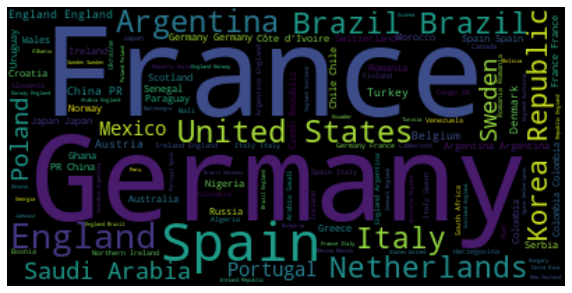

In [88]:
from wordcloud import WordCloud
nationality_name = " ".join(n for n in df['nationality_name'])
plt.figure(figsize=(10, 10)) 
wc = WordCloud().generate(nationality_name) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()